In [1]:
import pandas as pd
import understatapi

client = understatapi.UnderstatClient()

In [2]:

# Let's first get data from a league to retrieve a list of matches
league_data = client.league(league="Bundesliga").get_match_data(season="2024")
league_data[7]

{'id': '27749',
 'isResult': True,
 'h': {'id': '131', 'title': 'Wolfsburg', 'short_title': 'WOL'},
 'a': {'id': '117', 'title': 'Bayern Munich', 'short_title': 'BAY'},
 'goals': {'h': '2', 'a': '3'},
 'xG': {'h': '2.08125', 'a': '2.17538'},
 'datetime': '2024-08-25 13:30:00',
 'forecast': {'w': '0.3596', 'd': '0.2516', 'l': '0.3888'}}

In [3]:
# now we can use the match id to get the match data
shot_data = client.match(match=league_data[7]["id"]).get_shot_data()
shot_data['a'][1]

{'id': '586689',
 'minute': '10',
 'result': 'SavedShot',
 'X': '0.9230000305175782',
 'Y': '0.3390000152587891',
 'xG': '0.07864826172590256',
 'player': 'Harry Kane',
 'h_a': 'a',
 'player_id': '647',
 'situation': 'OpenPlay',
 'season': '2024',
 'shotType': 'RightFoot',
 'match_id': '27749',
 'h_team': 'Wolfsburg',
 'a_team': 'Bayern Munich',
 'h_goals': '2',
 'a_goals': '3',
 'date': '2024-08-25 13:30:00',
 'player_assisted': 'Michael Olise',
 'lastAction': 'Pass'}

In [4]:
# now let's get all of the data for a player, with this method you need to use the player_id
# This is literally every shot they ever took.

player_data = client.player(player='647').get_shot_data()
player_data[0]

{'id': '14642',
 'minute': '83',
 'result': 'BlockedShot',
 'X': '0.795',
 'Y': '0.32099998474121094',
 'xG': '0.04750959947705269',
 'player': 'Harry Kane',
 'h_a': 'a',
 'player_id': '647',
 'situation': 'OpenPlay',
 'season': '2014',
 'shotType': 'RightFoot',
 'match_id': '4754',
 'h_team': 'West Ham',
 'a_team': 'Tottenham',
 'h_goals': '0',
 'a_goals': '1',
 'date': '2014-08-16 15:00:00',
 'player_assisted': 'Andros Townsend',
 'lastAction': 'Pass'}

In [5]:
kane_df = pd.DataFrame(player_data)

In [6]:
kane_df

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,14642,83,BlockedShot,0.795,0.32099998474121094,0.04750959947705269,Harry Kane,a,647,OpenPlay,2014,RightFoot,4754,West Ham,Tottenham,0,1,2014-08-16 15:00:00,Andros Townsend,Pass
1,15400,81,OwnGoal,0.029000000953674318,0.5820000076293945,0,Harry Kane,a,647,SetPiece,2014,OtherBodyPart,4724,Sunderland,Tottenham,2,2,2014-09-13 15:00:00,None,Foul
2,16333,68,SavedShot,0.9059999847412109,0.46900001525878904,0.4358299970626831,Harry Kane,h,647,OpenPlay,2014,LeftFoot,4715,Tottenham,Newcastle United,1,2,2014-10-26 13:30:00,Danny Rose,Pass
3,16901,58,SavedShot,0.9169999694824219,0.46299999237060546,0.08578819781541824,Harry Kane,a,647,FromCorner,2014,Head,4657,Aston Villa,Tottenham,1,2,2014-11-02 16:00:00,Erik Lamela,Cross
4,16909,89,Goal,0.7609999847412109,0.415,0.0676921010017395,Harry Kane,a,647,DirectFreekick,2014,RightFoot,4657,Aston Villa,Tottenham,1,2,2014-11-02 16:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,601321,23,MissedShots,0.799000015258789,0.40700000762939453,0.04466920718550682,Harry Kane,a,647,OpenPlay,2024,RightFoot,27831,St. Pauli,Bayern Munich,0,1,2024-11-09 14:30:00,Jamal Musiala,Pass
1336,601325,52,MissedShots,0.915,0.6029999923706054,0.3302679657936096,Harry Kane,a,647,OpenPlay,2024,Head,27831,St. Pauli,Bayern Munich,0,1,2024-11-09 14:30:00,Dayotchanculle Upamecano,Aerial
1337,601326,70,BlockedShot,0.735,0.40599998474121096,0.02681059204041958,Harry Kane,a,647,OpenPlay,2024,RightFoot,27831,St. Pauli,Bayern Munich,0,1,2024-11-09 14:30:00,Leon Goretzka,Pass
1338,601331,81,MissedShots,0.885,0.5840000152587891,0.11367985606193542,Harry Kane,a,647,OpenPlay,2024,LeftFoot,27831,St. Pauli,Bayern Munich,0,1,2024-11-09 14:30:00,Alphonso Davies,Pass


In [7]:
# Définir les dates de début et de fin pour le filtrage
start_date = '2024-08-01'
end_date = '2025-06-30'

# Filtrer le DataFrame entre les dates
filtered_df = kane_df[(kane_df['date'] >= start_date) & (kane_df['date'] <= end_date)]

# Afficher le DataFrame filtré
print(filtered_df)

          id minute       result                   X                    Y  \
1300  586689     10    SavedShot  0.9230000305175782   0.3390000152587891   
1301  586707     79  BlockedShot               0.915   0.5179999923706055   
1302  590031     34  BlockedShot   0.924000015258789   0.5670000076293945   
1303  590032     37         Goal               0.885                  0.5   
1304  590044     92  BlockedShot  0.9030000305175782   0.5690000152587891   
1305  591031      6         Goal   0.845999984741211   0.5790000152587891   
1306  591035     25  MissedShots  0.9059999847412109                 0.45   
1307  591040     42         Goal  0.8080000305175781                 0.44   
1308  591046     49  MissedShots  0.9680000305175781  0.40099998474121096   
1309  591055     82  BlockedShot  0.7480000305175781   0.5209999847412109   
1310  591058     90         Goal               0.885                  0.5   
1311  592173     15  MissedShots  0.7230000305175781                0.485   

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch

In [9]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 1300 to 1339
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               40 non-null     object
 1   minute           40 non-null     object
 2   result           40 non-null     object
 3   X                40 non-null     object
 4   Y                40 non-null     object
 5   xG               40 non-null     object
 6   player           40 non-null     object
 7   h_a              40 non-null     object
 8   player_id        40 non-null     object
 9   situation        40 non-null     object
 10  season           40 non-null     object
 11  shotType         40 non-null     object
 12  match_id         40 non-null     object
 13  h_team           40 non-null     object
 14  a_team           40 non-null     object
 15  h_goals          40 non-null     object
 16  a_goals          40 non-null     object
 17  date             40 non-null     obje

In [10]:
# Changer les types de colonnes dans le DataFrame filtered_df
filtered_df['id'] = filtered_df['id'].astype(int)  # Changez à int
filtered_df['minute'] = filtered_df['minute'].astype(int)  # Changez à int
filtered_df['result'] = filtered_df['result'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['X'] = filtered_df['X'].astype(float)  # Changez à float
filtered_df['Y'] = filtered_df['Y'].astype(float)  # Changez à float
filtered_df['xG'] = filtered_df['xG'].astype(float)  # Changez à float
filtered_df['player'] = filtered_df['player'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['h_a'] = filtered_df['h_a'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['player_id'] = filtered_df['player_id'].astype(int)  # Changez à int
filtered_df['situation'] = filtered_df['situation'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['season'] = filtered_df['season'].astype(int)  # Changez à int
filtered_df['shotType'] = filtered_df['shotType'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['match_id'] = filtered_df['match_id'].astype(int)  # Changez à int
filtered_df['h_team'] = filtered_df['h_team'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['a_team'] = filtered_df['a_team'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['h_goals'] = filtered_df['h_goals'].astype(int)  # Changez à int
filtered_df['a_goals'] = filtered_df['a_goals'].astype(int)  # Changez à int
filtered_df['date'] = filtered_df['date'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['player_assisted'] = filtered_df['player_assisted'].astype(str)  # Assurez-vous que c'est un objet
filtered_df['lastAction'] = filtered_df['lastAction'].astype(str)  # Assurez-vous que c'est un objet

C:\Users\HP\AppData\Local\Temp\ipykernel_18340\3004862032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['id'] = filtered_df['id'].astype(int)  # Changez à int
C:\Users\HP\AppData\Local\Temp\ipykernel_18340\3004862032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['minute'] = filtered_df['minute'].astype(int)  # Changez à int
C:\Users\HP\AppData\Local\Temp\ipykernel_18340\3004862032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [11]:
filtered_df['X'] = filtered_df['X'] * 100
filtered_df['Y'] = filtered_df['Y'] * 100

C:\Users\HP\AppData\Local\Temp\ipykernel_18340\2869361486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['X'] = filtered_df['X'] * 100
C:\Users\HP\AppData\Local\Temp\ipykernel_18340\2869361486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Y'] = filtered_df['Y'] * 100


In [12]:
total_shots = filtered_df.shape[0]
total_goals = filtered_df[filtered_df['result'] == 'Goal'].shape[0]
total_xg = filtered_df['xG'].sum()
xg_per_shor = total_xg / total_shots
points_avg_distance = filtered_df['X'].mean()
actual_avg_distance = 120 - (filtered_df['X'] *1.2).mean()

In [13]:

actual_avg_distance

np.float64(15.314999313354477)

In [14]:

print(filtered_df['xG'].dtype)  # Vérifiez le type de xG
print(filtered_df['xG'].isnull().sum())  # Vérifiez les valeurs nulles


float64
0


In [15]:

background_color = '#0C0D0E'
# Font -> Fonts are tricky since they have their "brand fonts" so we'll just use something similar
import matplotlib.font_manager as font_manager
font_path = 'Arvo-Regular.ttf'
# Create a font properties object with the font file
font_props = font_manager.FontProperties(fname=font_path)

In [16]:
pitch = VerticalPitch(
    pitch_type='opta',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='white',
    linewidth=.75,
    axis=True, label=True
)

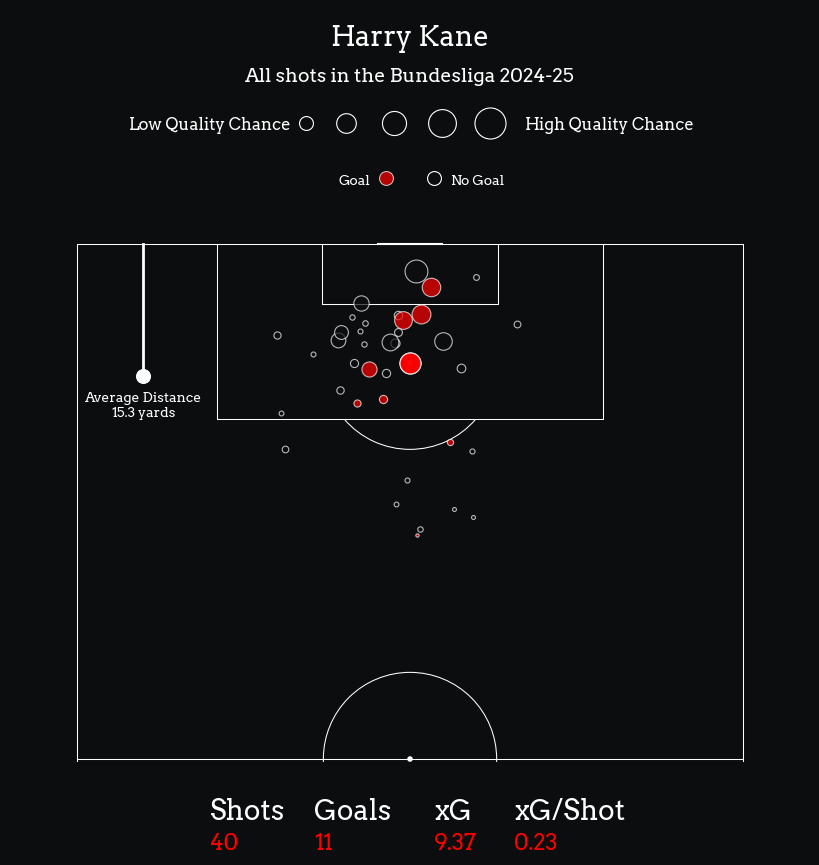

In [17]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)


# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5,
    y=.85,
    s='Harry Kane',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='center'
)
ax1.text(
    x=0.5,
    y=.7,
    s=f'All shots in the Bundesliga 2024-25',
    fontsize=14,
    fontweight='bold',
    fontproperties=font_props,
    color='white',
    ha='center'
)
ax1.text(
    x=0.25,
    y=0.5,
    s=f'Low Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.53,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.53,
    s=200,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.53,
    s=300,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.53,
    s=400,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.53,
    s=500,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.5,
    s=f'High Quality Chance',
    fontsize=12,
    fontproperties=font_props,
    color='white',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.27,
    s=f'Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.3,
    s=100,
    color='red',
    edgecolor='white',
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53,
    y=0.3,
    s=100,
    color=background_color,
    edgecolor='white',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.27,
    s=f'No Goal',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90,
    y=points_avg_distance,
    s=100,
    color='white',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90],
    [100, points_avg_distance],
    color='white',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=90,
    y=points_avg_distance - 4,
    s=f'Average Distance\n{actual_avg_distance:.1f} yards',
    fontsize=10,
    fontproperties=font_props,
    color='white',
    ha='center'
)

for x in filtered_df.to_dict(orient='records'):
    pitch.scatter(
        x['X'],
        x['Y'],
        s=300 * x['xG'],
        color='red' if x['result'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='white'
    )


ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25,
    y=.5,
    s='Shots',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.25,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.38,
    y=.5,
    s='Goals',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.38,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.53,
    y=.5,
    s='xG',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.53,
    y=0,
    s=f'{total_xg:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.text(
    x=0.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold',
    color='white',
    ha='left'
)

ax3.text(
    x=0.63,
    y=0,
    s=f'{xg_per_shor:.2f}',
    fontsize=16,
    fontproperties=font_props,
    color='red',
    ha='left'
)

ax3.set_axis_off()

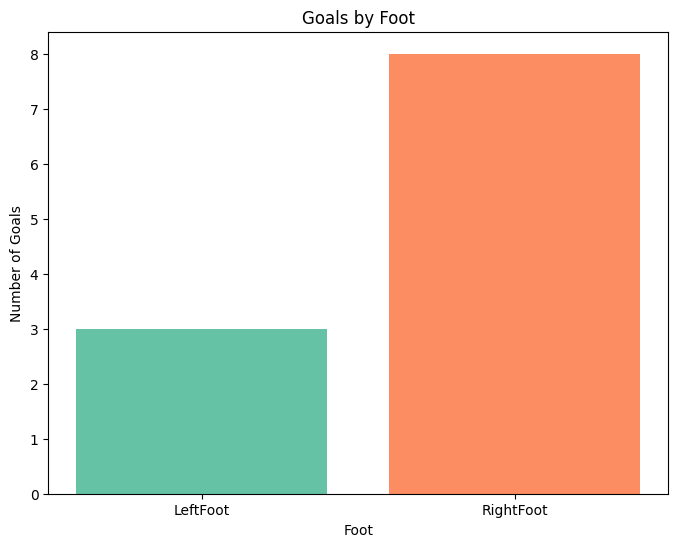

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of goals by foot
goals_by_foot = filtered_df[filtered_df['result'] == 'Goal'].groupby('shotType').size()


palette = sns.color_palette("Set2")

# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(goals_by_foot.index, goals_by_foot.values, color=palette[:len(goals_by_foot)])
plt.title('Goals by Foot')
plt.xlabel('Foot')
plt.ylabel('Number of Goals')
# Save the plot as a PNG file
plt.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/kane_plots/goals_by_foot.png')

# Show plot
plt.show()


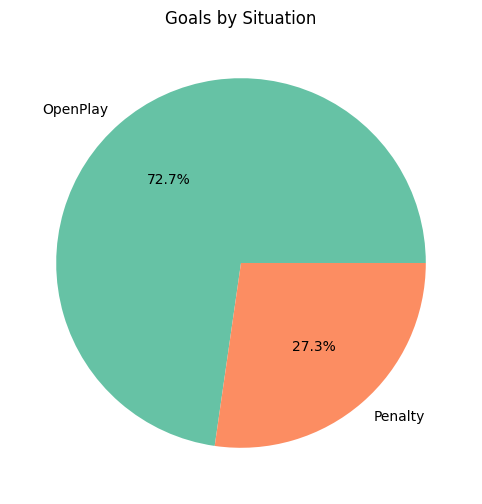

In [19]:
# Count the number of goals by situation
goals_by_situation = filtered_df[filtered_df['result'] == 'Goal'].groupby('situation').size()


palette = sns.color_palette("Set2")
# Plot pie chart
plt.figure(figsize=(8, 6))
goals_by_situation.plot(kind='pie', autopct='%1.1f%%', colors=palette[:len(goals_by_situation)])

plt.title('Goals by Situation')
plt.ylabel('')

# Save the plot as a PNG file
plt.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/kane_plots/goals_by_situation.png')


plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_18340\2500739575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['opponent'] = filtered_df.apply(lambda row: row['a_team'] if row['h_team'] == 'Bayern Munich' else row['h_team'], axis=1)


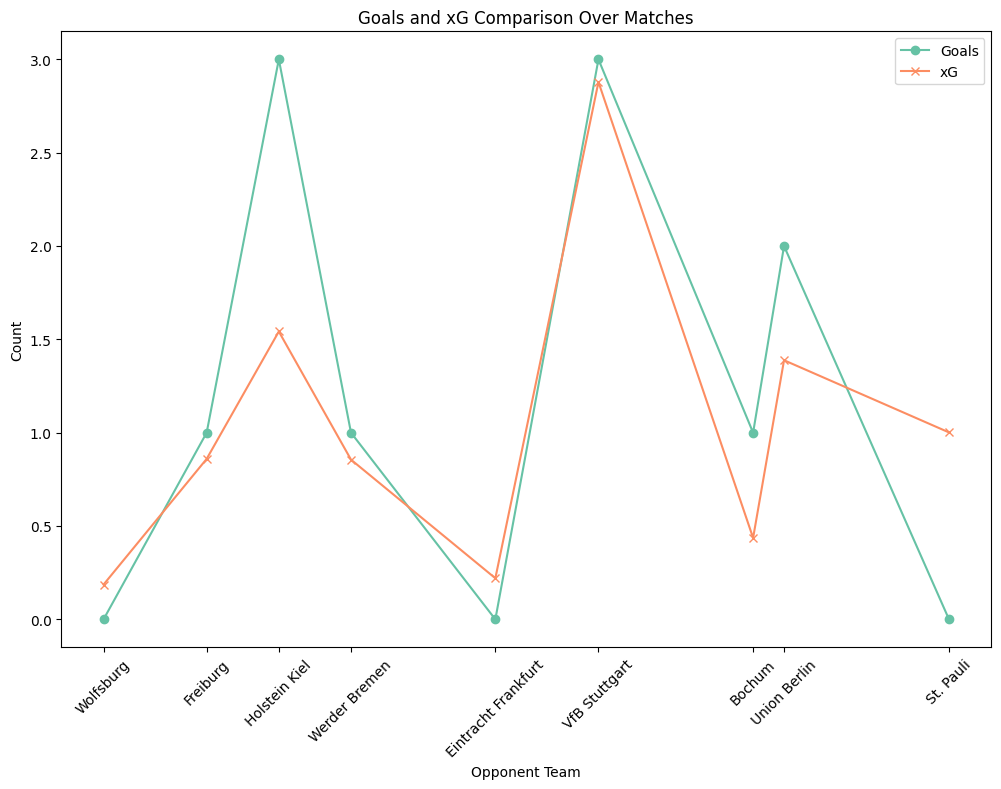

In [20]:

# Aggregate goals and xG by match
goals_xg_match = filtered_df.groupby('match_id').agg({'result': lambda x: (x == 'Goal').sum(), 'xG': 'sum'})

# Create a list of opponent teams based on the match_id
filtered_df['opponent'] = filtered_df.apply(lambda row: row['a_team'] if row['h_team'] == 'Bayern Munich' else row['h_team'], axis=1)

# Get the opponent teams
opponent_teams = filtered_df.groupby('match_id').first()['opponent']

# Set the Seaborn palette
palette = sns.color_palette("Set2")

# Plot line chart
plt.figure(figsize=(12, 8))
plt.plot(goals_xg_match.index, goals_xg_match['result'], label='Goals', marker='o', color=palette[0])
plt.plot(goals_xg_match.index, goals_xg_match['xG'], label='xG', marker='x', color=palette[1])
plt.title('Goals and xG Comparison Over Matches')

# Set x-axis labels as opponent teams
plt.xticks(ticks=goals_xg_match.index, labels=opponent_teams)

plt.xlabel('Opponent Team')
plt.ylabel('Count')
plt.legend()
# Set the x-axis ticks and labels to the opponent teams, spaced equally
plt.xticks(ticks=goals_xg_match.index, labels=opponent_teams, rotation=45)
# Save the plot as a PNG file
plt.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/kane_plots/goals_xg_match.png')
plt.show()


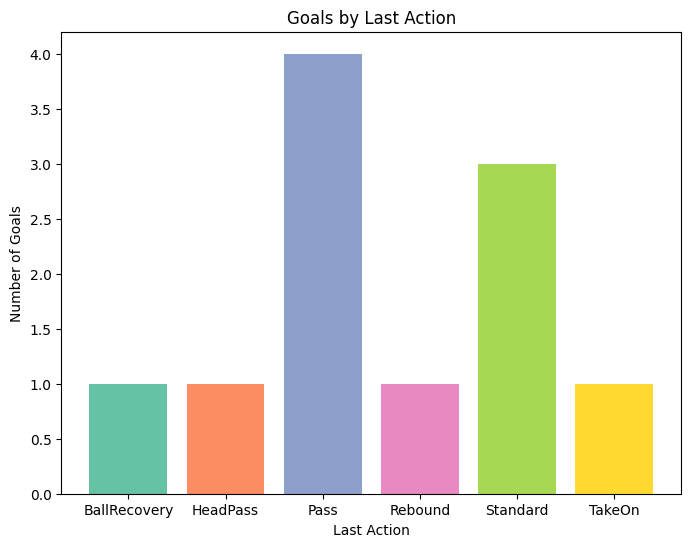

In [21]:
# Count the number of goals by last action
goals_by_last_action = filtered_df[filtered_df['result'] == 'Goal'].groupby('lastAction').size()


palette = sns.color_palette("Set2")
# Plot bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(goals_by_last_action.index, goals_by_last_action.values, color=palette[:len(goals_by_last_action)])
plt.title('Goals by Last Action')
plt.xlabel('Last Action')
plt.ylabel('Number of Goals')

# Save the plot as a PNG file
plt.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/kane_plots/goals_by_last_action.png')
plt.show()


In [22]:
filtered_df.to_csv('harry_kane_stats_2024.csv')

In [23]:
fig.savefig('C:/Users/HP/Desktop/ETL_PROJECTS/Football_projects/Compare_2_players/kane_plots/harry_kane_2024.png', facecolor=background_color, bbox_inches='tight')
